In [1]:
!pip install --upgrade scikit-learn



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


[INFO] Loaded 144 rows, 72 cols
Train: 115, Test: 29
RMSE (Random Forest baseline): 586.85


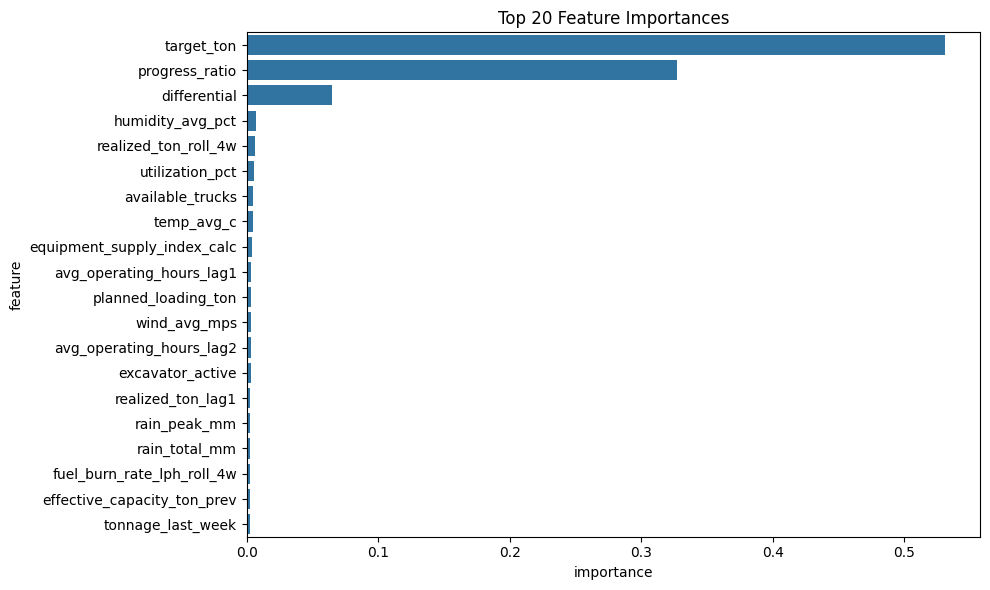

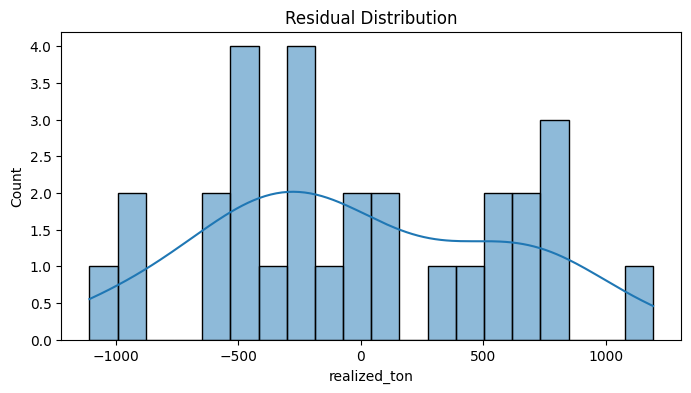

In [2]:
# %% [markdown]
# # Ice Tea Mode — Random Forest Baseline

# %% 
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# %% 
# Path dataset
MERGE_DIR = Path("../all_dataset/merge_dataset")
data_path = MERGE_DIR / "merged_model_ready.csv"

# Load dataset
df = pd.read_csv(data_path, parse_dates=["week_start"])
print(f"[INFO] Loaded {len(df)} rows, {len(df.columns)} cols")

# %% 
# Feature & target
# Drop any columns not needed / IDs
drop_cols = ["week_start", "pit_id_num", "stockpile_num"]  # adjust sesuai kebutuhan
target = "realized_ton"

X = df.drop(columns=drop_cols + [target])
y = df[target]

# %% 
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train: {len(X_train)}, Test: {len(X_test)}")

# %% 
# Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# %% 
# Predict & evaluate
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE (Random Forest baseline): {rmse:.2f}")

# %% 
# Feature importance
feat_imp = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=feat_imp.head(20))
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()

# %% 
# Optional: residual check
residuals = y_test - y_pred
plt.figure(figsize=(8,4))
sns.histplot(residuals, bins=20, kde=True)
plt.title("Residual Distribution")
plt.show()
